In [2]:
#Import libraries
!pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


  Using cached numpy-2.3.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pandas-2.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached numpy-2.3.2-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
Using cached pandas-2.3.2-cp312-cp312-macosx_11_0_arm64.whl (10.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 35.4 MB/s  0:00:00 eta 0:00:01
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-

In [3]:
# ==========================================
# Generate synthetic dataset (200 samples)
# ==========================================
rng = np.random.default_rng(42)   # reproducible results

n = 200
x = rng.uniform(0, 5, size=n)            # x in [0,5]
noise = rng.normal(0, 1, size=n)         # Gaussian noise
y = 3 + 4*x + noise                      # y = 3 + 4x + noise

# Put in DataFrame for clarity
df = pd.DataFrame({"x": x, "y": y})
df.head(10)   # preview first 10 rows


,x,y
0,3.869780,19.122448
1,2.194392,11.382964
2,4.292990,20.166837
3,3.486840,16.783918
4,0.470887,5.221122
5,4.878112,23.919929
6,3.805699,18.313379
7,3.930322,19.365225
8,0.640568,3.512101
9,2.251930,11.959000


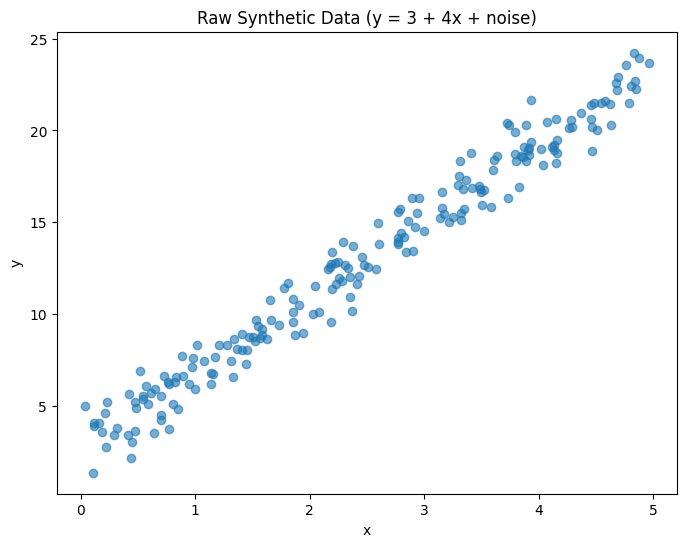

In [4]:
# =====================================
#  Plot raw synthetic dataset
# =====================================
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw Synthetic Data (y = 3 + 4x + noise)")
plt.show()


In [5]:
# ======================================
# Closed-form (Normal Equation)
# ======================================
# Add bias column of 1's
X = np.column_stack([np.ones_like(x), x])

# theta = (X^T X)^(-1) X^T y
theta_closed = np.linalg.inv(X.T @ X) @ (X.T @ y)
intercept_closed, slope_closed = theta_closed

print("Closed-form solution (Normal Equation):")
print(f"  Intercept (theta_0): {intercept_closed:.6f}")
print(f"  Slope     (theta_1): {slope_closed:.6f}")


Closed-form solution (Normal Equation):
  Intercept (theta_0): 2.690841
  Slope     (theta_1): 4.131842


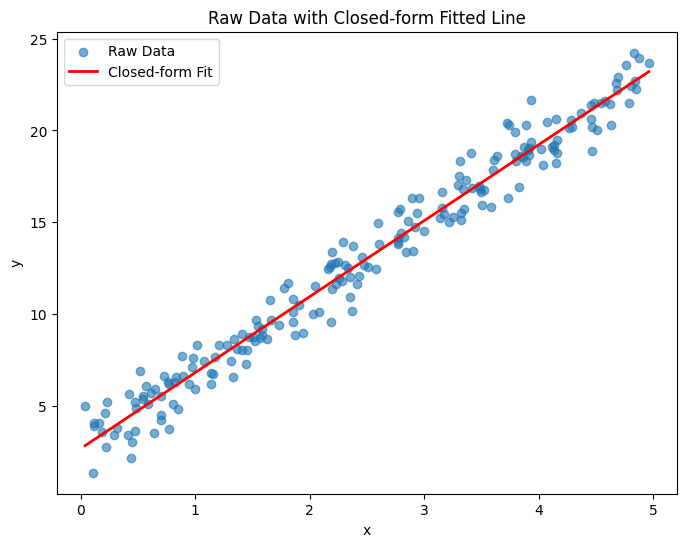

In [6]:
# ======================================
# Plot raw data + fitted line
# ======================================
# Sort values for a clean line
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
X_sorted = X[sort_idx]

# Predictions using closed-form solution
y_closed_sorted = X_sorted @ theta_closed

# Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label="Raw Data")
plt.plot(x_sorted, y_closed_sorted, color="red", linewidth=2, label="Closed-form Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw Data with Closed-form Fitted Line")
plt.legend()
plt.show()


In [7]:
# ======================================
# Gradient Descent Implementation
# ======================================

# Initialize theta = [0,0]
theta = np.zeros(2)

# Hyperparameters
eta = 0.05       # learning rate
iters = 1000     # number of iterations
loss_history = []  # to store MSE values

n = len(y)

# Gradient Descent loop
for _ in range(iters):
    y_pred = X @ theta                     # predictions
    residuals = y_pred - y                 # errors
    mse = np.mean(residuals**2)            # mean squared error
    loss_history.append(mse)
    grad = (2/n) * (X.T @ residuals)       # gradient of MSE
    theta = theta - eta * grad             # update rule

# Extract final parameters
intercept_gd, slope_gd = theta
print("Gradient Descent solution:")
print(f"  Intercept (theta_0): {intercept_gd:.6f}")
print(f"  Slope     (theta_1): {slope_gd:.6f}")


Gradient Descent solution:
  Intercept (theta_0): 2.690841
  Slope     (theta_1): 4.131842


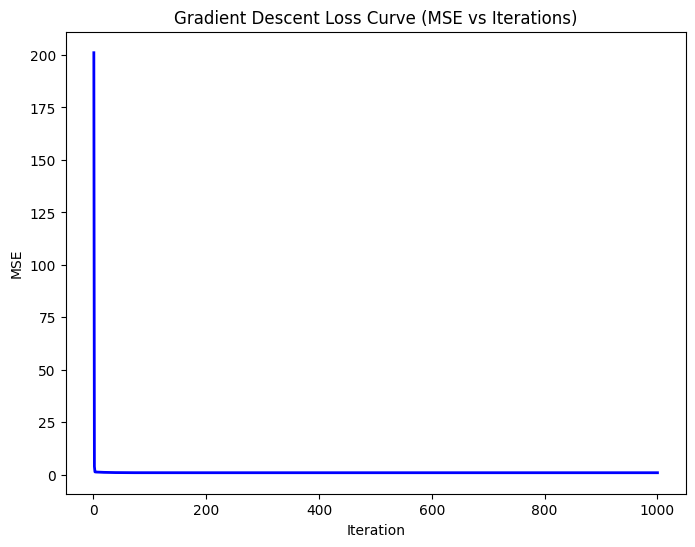

In [8]:
# ======================================
# Plot loss curve
# ======================================
plt.figure(figsize=(8,6))
plt.plot(range(1, iters+1), loss_history, color="blue", linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent Loss Curve (MSE vs Iterations)")
plt.show()


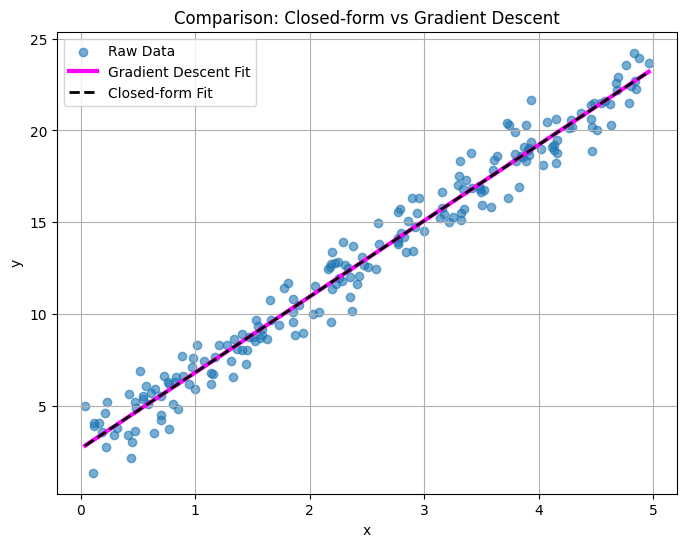

In [16]:
# ======================================
# Compare GD fitted line with data
# ======================================
# Gradient Descent predictions
y_gd_sorted = X_sorted @ theta

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label="Raw Data")

# Gradient Descent Fit: bold magenta solid line
plt.plot(x_sorted, y_gd_sorted, color='magenta', linewidth=3, label="Gradient Descent Fit")

# Closed-form Fit: black dashed line
plt.plot(x_sorted, X_sorted @ theta_closed, color='black', linestyle='--', linewidth=2, label="Closed-form Fit")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison: Closed-form vs Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()




In [10]:
# ======================================
#  Compare solutions
# ======================================

print("---- Comparison ----")
print(f"Closed-form Solution:   Intercept = {theta_closed[0]:.6f}, Slope = {theta_closed[1]:.6f}")
print(f"Gradient Descent Solution: Intercept = {intercept_gd:.6f}, Slope = {slope_gd:.6f}")

# Comment in plain text
if np.allclose(theta_closed, theta, atol=0.1):
    print("\n✅ Gradient Descent converged to (almost) the same solution as the closed-form.")
else:
    print("\n⚠️ Gradient Descent did not fully converge, consider adjusting learning rate or iterations.")


---- Comparison ----
Closed-form Solution:   Intercept = 2.690841, Slope = 4.131842
Gradient Descent Solution: Intercept = 2.690841, Slope = 4.131842

✅ Gradient Descent converged to (almost) the same solution as the closed-form.


In [ ]:
# Short Explanation:
# Both the closed-form solution and Gradient Descent produced nearly identical parameters (intercept ≈ 2.69, slope ≈ 4.13). 
# This shows that Gradient Descent successfully converged to the same optimal solution as the Normal Equation, since both minimize the same convex MSE cost function.